In [111]:
import numpy as np
import ast
import matplotlib.pyplot as plt
from parameter_tester import params_to_J, params_to_P, params_to_w

In [12]:
def mean_list_to_param_list(mean_list: list):
    return [params_to_J(mean_list[0]), params_to_J(mean_list[1]), params_to_J(mean_list[2]), params_to_J(mean_list[3]),
            params_to_P(mean_list[4]), params_to_P(mean_list[5]), params_to_P(mean_list[6]), params_to_P(mean_list[7]),
            params_to_w(mean_list[8]), params_to_w(mean_list[9]), params_to_w(mean_list[10]), params_to_w(mean_list[11]),]

def read_log_file(file):
    data = []
    with open(file, "r") as f:
        for line in f:
            res = ast.literal_eval(line)
            data.append(mean_list_to_param_list(res))
    return np.array(data).transpose(1, 0)

In [13]:
J_start = read_log_file("/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/playground/investigating_j_starting.log")
P_start = read_log_file("/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/playground/investigating_p_starting.log")
w_start = read_log_file("/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/playground/investigating_w_starting.log")

J_end = read_log_file("/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/playground/investigating_j_ending.log")
P_end = read_log_file("/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/playground/investigating_p_ending.log")
w_end = read_log_file("/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/playground/investigating_w_ending.log")

In [85]:
J_index = {0, 1, 2, 3}
P_index = {4, 5, 6, 7}
w_index = {8, 9, 10, 11}
colors = ["blue", "orange", "green", "red"]
def print_deviation_analysis(start, end):
    fig, axs = plt.subplots(3, 1, sharex=True)
    fig.set_figwidth(10)
    fig.set_figheight(10)
    axs[0].set_ylim(0, 80)
    axs[1].set_ylim(0, 1)
    axs[2].set_ylim(40, 70)
    axs[0].set_title("Variation in J")
    axs[1].set_title("Variation in P")
    axs[2].set_title("Variation in w")

    axs[0].set_ylabel("Synaptic Efficacy Parameter")
    axs[1].set_ylabel("Connection Probability Parameter")
    axs[2].set_ylabel("Circular Gaussian Width Parameter")
    axs[2].set_xlabel("trial index")
    for i, (array1, array2) in enumerate(zip(start, end)):
        color = colors[i % 4]
        if i in J_index:
            axs[0].plot(array1, color=color, linestyle='--')
            axs[0].plot(array2, color=color, linestyle=':')
        if i in P_index:
            axs[1].plot(array1, color=color, linestyle='--')
            axs[1].plot(array2, color=color, linestyle=':')
        if i in w_index:
            axs[2].plot(array1, color=color, linestyle='--')
            axs[2].plot(array2, color=color, linestyle=':')
    

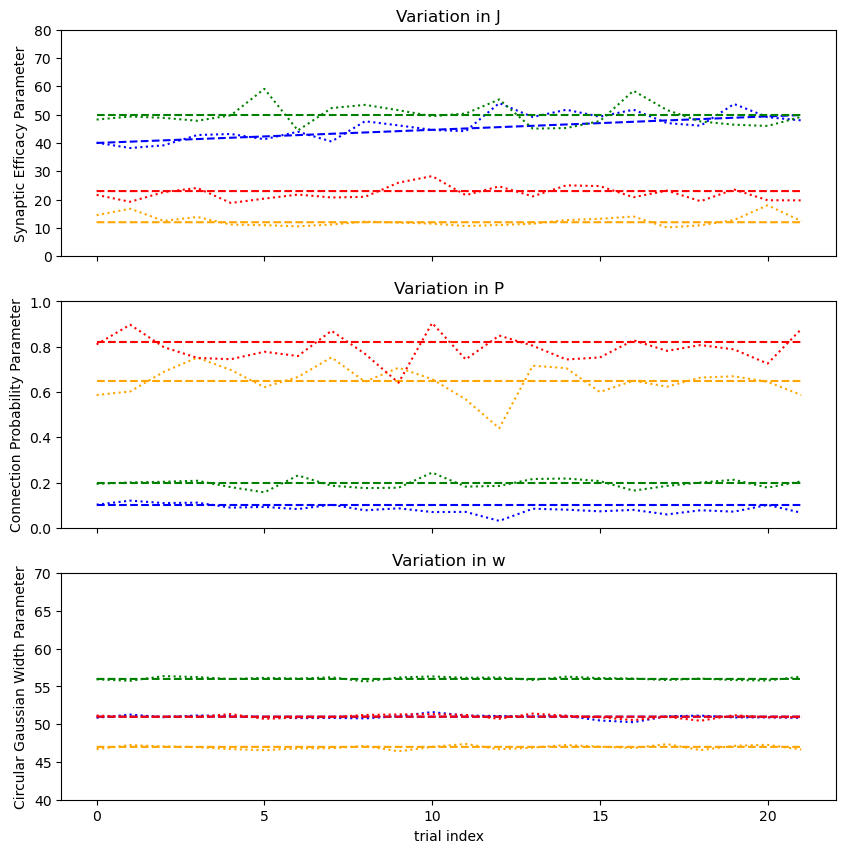

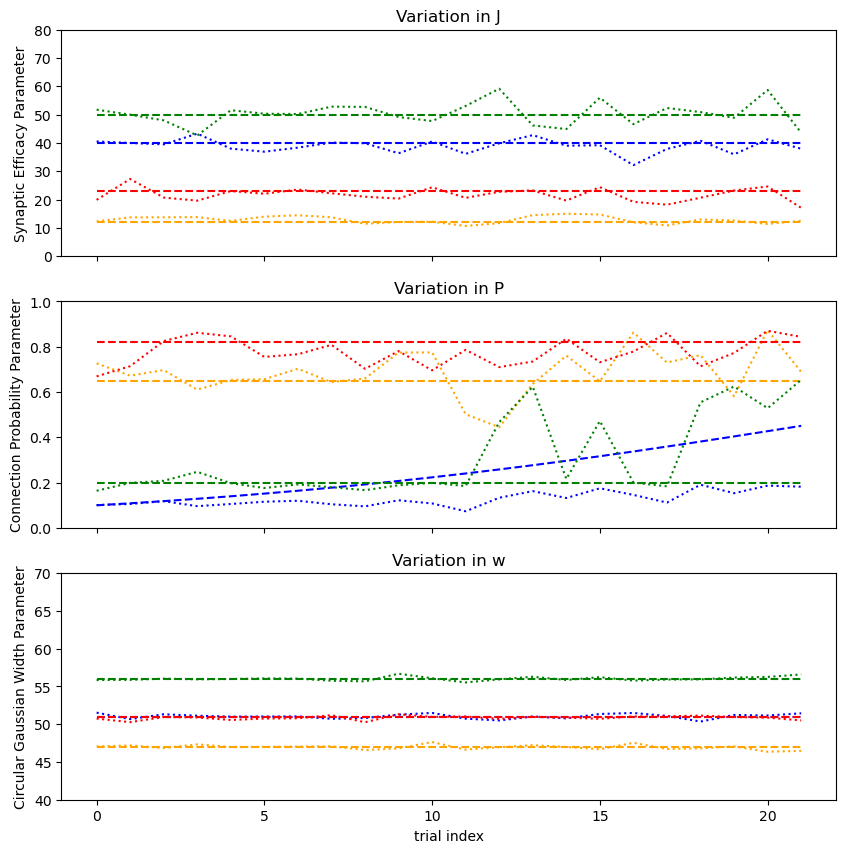

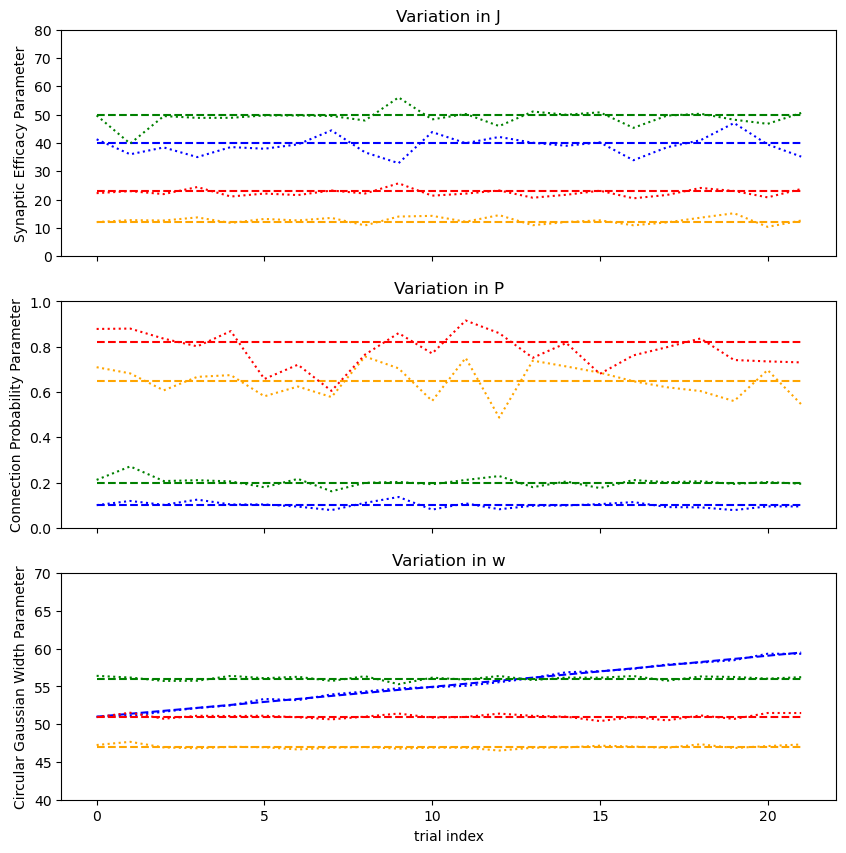

In [86]:
print_deviation_analysis(J_start, J_end)
print_deviation_analysis(P_start, P_end)
print_deviation_analysis(w_start, w_end)

In [118]:
import pickle

with open("/Users/paopao_ch/Documents/projects/v1_modelling/Mouse-V1-Pytorch/log_1710087598.6343522/results.pkl", "rb") as pf:
    J_data = pickle.load(pf)

In [119]:
J_start = []
J_end = []
for i in range(len(J_data["start_means"])):
    start = mean_list_to_param_list(J_data["start_means"][i])
    end = mean_list_to_param_list(J_data["end_means"][i])
    J_start.append(start)
    J_end.append(end)
J_start = np.array(J_start).transpose(1, 0)
J_end = np.array(J_end).transpose(1, 0)

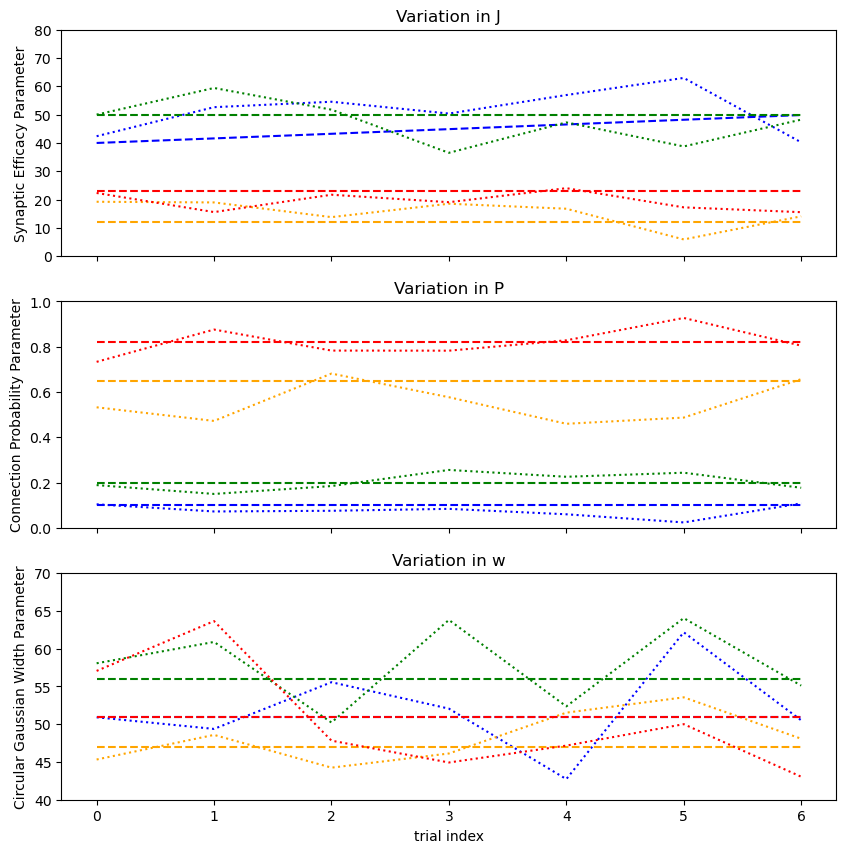

In [120]:
print_deviation_analysis(J_start, J_end)